 ---------------------------------------------------------------
#Module: 5DATA002W.2 - Machine Learning and Data Mining

Coursework deliverable :  Classification Modelling & Hyperparameters Tuning (Python Notebook 2)



---


Student Name: Rochana Thamaramalee Pasqual

Code Peer Reviewed by -

Date of the review -


---



Note:

All code techniques and processes are adapted from
5DATA002W.2 Tutorial 2,3 provided by the module leader.


*Seminar : Build and Evaluate Predictive Models with Scikit-Learn & Building a k-Nearest-Neighbours (kNN), Naïve Bayes (NB) Models & Hyperparameters Optimisation *

Specific tutorial page numbers are referenced in each cell.



Additional support and references include basic Python programming concepts,
relevant official library documentations (e.g., pandas, plotly,numpy, sklearn),and general online research where necessary.


Tutorial 2 & 3 : page 1

In [50]:
#import Libraries
#import pandas - daya manipulation
import pandas as pd
#Feature Starnderdization
from sklearn.preprocessing import StandardScaler
#data splitting tools
from sklearn.model_selection import train_test_split
#Logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Import the function to calculate accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
#Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
#LK-nearest neibhor classifier
from sklearn.neighbors import KNeighborsClassifier
#plotting and visualization
import matplotlib.pyplot as plt
#preprocessessing part from sklearn
from sklearn import preprocessing
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import numpy as np
#saving and laoding trained models
import joblib

Reference : Tutorial 1 (Seminar 1 & 2) , Page 13

In [51]:
# load dataset
dataset = pd.read_csv('/content/drive/MyDrive/CW-ML/Clean_data(Classification).csv')
#1st five rows of the dataset
dataset.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,0,1,1,1,0,3,1,4.0,1,1,24.0,1,0
1,50.0,0,2,2,2,1,2,1,35.0,1,1,14.0,5,0
2,58.0,0,3,3,3,1,2,1,63.0,1,1,14.0,7,0
3,58.0,0,1,1,1,0,3,1,18.0,1,1,2.0,1,0
4,47.0,0,2,1,4,0,3,1,41.0,1,1,3.0,1,0


Tutorial 2 : page 8

In [52]:
#split dataset in features and target variable
# Features
x = dataset.drop(columns=['Mortality_Status'])
# Target variable
y = dataset['Mortality_Status']

tutorial 2 : page 8

In [53]:
#list of features
print('List of Columns : ',x.columns)

List of Columns :  Index(['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive'],
      dtype='object')


tutorial 2 : page 8

In [54]:
#diamention of dataset
print('data shape : ',x.shape)

data shape :  (4024, 13)


Reference : Tutorial 2 - page 8,9

In [55]:
#standardization
scaler = StandardScaler()
#Scale the dataset
x_Scaled = scaler.fit_transform(x)

Reference : Tutorial 2 - page 8,9

In [56]:
# split X and y into training and testing sets
x_train_Scaled,x_test_Scaled,y_train,y_test=train_test_split(x_Scaled,y,test_size=0.30,random_state=42,stratify=y)
#print whole data shape
print('Whole Data shape', dataset.shape)
#print x train shape
print('x_train shape', x_train_Scaled.shape)
#print x test shaoe
print('x_test shape', x_test_Scaled.shape)

Whole Data shape (4024, 14)
x_train shape (2816, 13)
x_test shape (1208, 13)


tutorial 1 : page 21,22

In [57]:
# print to see the propotions of target classes of y
print(y.value_counts(normalize=True).round(2) * 100)

Mortality_Status
0    85.0
1    15.0
Name: proportion, dtype: float64


tutorial 1 : page 21,22

In [58]:
# print to see the propotions of target classes of y train
print(y_train.value_counts(normalize=True).round(2) * 100)

Mortality_Status
0    85.0
1    15.0
Name: proportion, dtype: float64


tutorial 1 : page 21,22

In [59]:
# print to see the propotions of target classes of y test
print(y_test.value_counts(normalize=True).round(2) * 100)

Mortality_Status
0    85.0
1    15.0
Name: proportion, dtype: float64


Brownlee, J. (2020). How to Avoid Data Leakage When Performing Data Preparation. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/data-preparation-without-data-leakage/.

scikit-learn (2018).sklearn.model_selection.train_test_split — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Reference : Tutorial 1 (Seminar 1 & 2) , Page 21

In [60]:
#Logistic Regression-start
#assign scaled features for training
LR_x_train = x_train_Scaled
#assign scaled features for testing
LR_x_test = x_test_Scaled
#assign target labels for training
LR_y_train = y_train
#assign target labels for testing
LR_y_test = y_test

Reference : Tutorial 2 , Page 9

In [61]:
#instantiate the model with default parameters
logreg = LogisticRegression()
#fit the model
logreg.fit(LR_x_train, LR_y_train)
#prediting with test data
LR_y_pred=logreg.predict(LR_x_test)

Reference : Tutorial 2 , Page 9

In [62]:
#To see the predicted values
LR_y_pred

array([0, 0, 0, ..., 0, 0, 0])

Reference : Tutorial 2 , Page 10

In [63]:
#comparison data table
Comparison_df = pd.DataFrame({'Actual ' : LR_y_test,  'Predicted' : LR_y_pred})
#Save it to drive
Comparison_df.to_csv(r'/content/drive/MyDrive/CW-ML/Diagnoses_df(1).csv', index=True)
#print data
Comparison_df

,Actual,Predicted
3183,0,0
93,1,0
1479,0,0
1545,0,0
2904,0,0
...,...,...
197,0,0
182,1,0
2933,0,0
2228,0,0


Reference : Tutorial 2 , Page 10,11,12

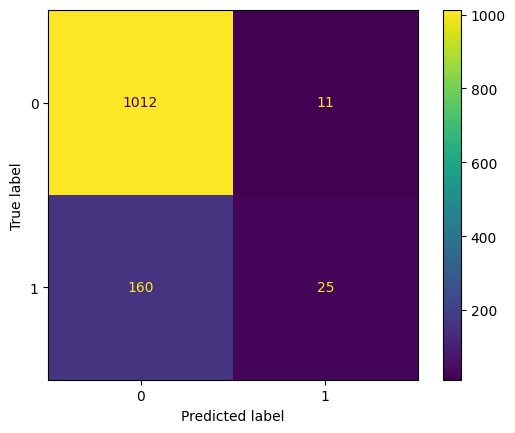

In [64]:
# Construct the confusion matrix cm
cm = confusion_matrix(LR_y_test, LR_y_pred, labels=logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
#display plot
disp.plot()

Reference : Tutorial 2 , Page 10,11,12

In [65]:
# Apply the function to find the correct predictions
accuracy_LR = accuracy_score(LR_y_test,LR_y_pred)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy_LR)

The Logistic Regression Model Accuracy: 0.8584437086092715


Reference : Tutorial 2 , Page 10,11,12

In [66]:
#print classification report
print(classification_report(LR_y_test, LR_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1023
           1       0.69      0.14      0.23       185

    accuracy                           0.86      1208
   macro avg       0.78      0.56      0.57      1208
weighted avg       0.84      0.86      0.82      1208



Reference : Tutorial 2 , Page 10,11,12

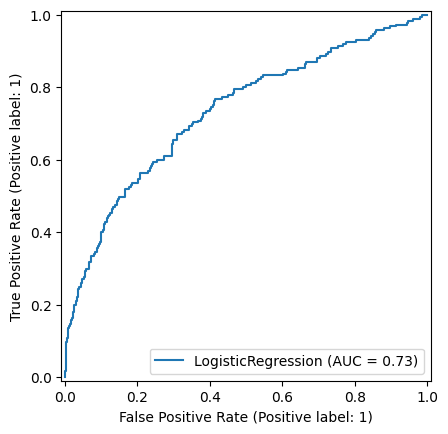

In [67]:
# Apply AUC-ROC to the model and test data.
Logreg_roc = RocCurveDisplay.from_estimator(logreg, LR_x_test, LR_y_test)

Reference : Tutorial 3 , Page 13,14,15,16

In [68]:
#Naive Bayes - start

#assign scaled features for training
NB_x_train = x_train_Scaled
#assign scaled features for testing
NB_x_test = x_test_Scaled
#assign target labels for training
NB_y_train = y_train
#assign target labels for testing
NB_y_test = y_test

Reference : Tutorial 3 , Page 13,14,15,16

In [69]:
#instantiate the model with default parameters
nb = GaussianNB()
#fit the model
nb.fit(NB_x_train, NB_y_train)
#prediting with test data
NB_y_pred=nb.predict(NB_x_test)

Reference : Tutorial 3 , Page 13,14,15,16

In [70]:
# Apply the function to find the correct predictions
accuracy_NB = accuracy_score(NB_y_test,NB_y_pred)
# Display the accuracy
print ('The Naive Bayes Model Accuracy:',accuracy_NB)

The Naive Bayes Model Accuracy: 0.7922185430463576


Reference : Tutorial 3 , Page 13,14,15,16

In [71]:
#print Classification report
print(classification_report(NB_y_test, NB_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1023
           1       0.34      0.39      0.36       185

    accuracy                           0.79      1208
   macro avg       0.61      0.63      0.62      1208
weighted avg       0.80      0.79      0.80      1208



Reference : Tutorial 3 , Page 13,14,15,16

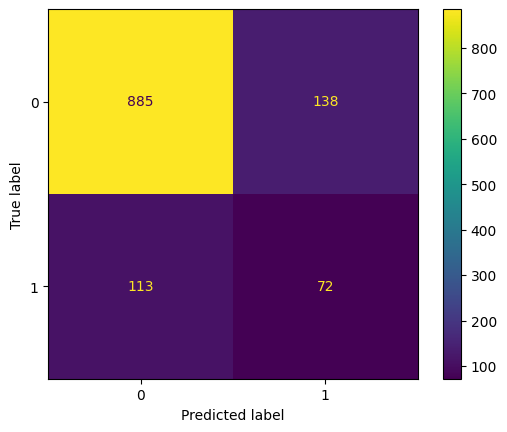

In [72]:
# Construct the confusion matrix
nb_cm = confusion_matrix(NB_y_test, NB_y_pred, labels = nb.classes_)
#Create a display to plot the confusion matrix
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
#display plot
nb_cm.plot()

Reference : Tutorial 3 , Page 13,14,15,16

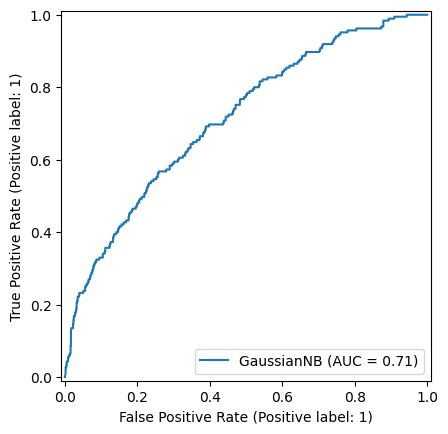

In [73]:
# Apply AUC-ROC to the model and test data.
nb_roc = RocCurveDisplay.from_estimator(nb, NB_x_test, NB_y_test)

# #KNN - K-Nearest-Neighbours

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [74]:
#KNN-K-Nearest-Neighbours-start

#assign scaled features for training
KNN_x_train = x_train_Scaled
#assign scaled features for testing
KNN_x_test = x_test_Scaled
#assign target labels for training
KNN_y_train = y_train
#assign target lebals for testing
KNN_y_test = y_test

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [75]:
#Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(KNN_x_train,KNN_y_train)

KNeighborsClassifier(n_neighbors=9)

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [76]:
#Perform predictions on the test data
KNN_y_pred=knn.predict(KNN_x_test)

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [77]:
#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':KNN_y_test, 'Predicted': KNN_y_pred})
#save to drive
compare_results_knn_df.to_csv(r'/content/drive/MyDrive/CW-ML/knn_pred_comparison(1).csv', index=True)
#display
compare_results_knn_df

,Actual,Predicted
3183,0,0
93,1,0
1479,0,0
1545,0,0
2904,0,0
...,...,...
197,0,0
182,1,0
2933,0,0
2228,0,1


Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [78]:
# Apply the function to find the correct predictions
accuracy_KNN9 = accuracy_score(KNN_y_test,KNN_y_pred)
# Display the accuracy
print ('The Logistic KNN-9 Model Accuracy:',accuracy_KNN9)

The Logistic KNN-9 Model Accuracy: 0.8394039735099338


Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [79]:
#print classification report
print(classification_report(KNN_y_test, KNN_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1023
           1       0.41      0.11      0.18       185

    accuracy                           0.84      1208
   macro avg       0.64      0.54      0.54      1208
weighted avg       0.79      0.84      0.80      1208



Reference : Tutorial 3 , Page 7,8,9,10,11,12

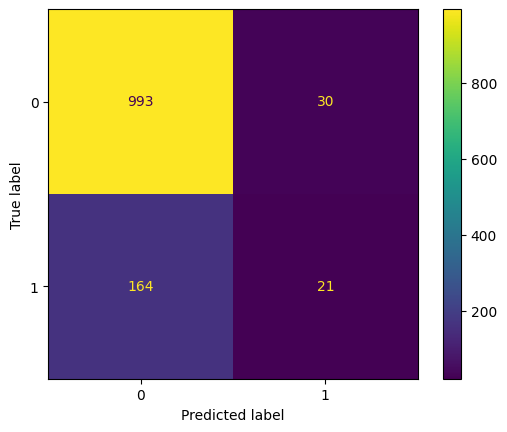

In [80]:
# Construct the confusion matrix
cm_knn = confusion_matrix(KNN_y_test, KNN_y_pred, labels = knn.classes_)
#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
#display
disp_knn_cm.plot()

Reference : Tutorial 3 , Page 7,8,9,10,11,12

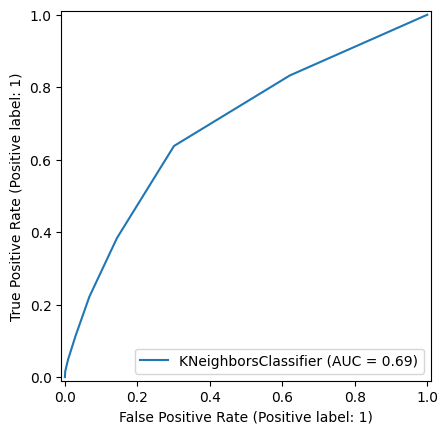

In [81]:
# Apply AUC-ROC to the model and test data.
knn_roc = RocCurveDisplay.from_estimator(knn, KNN_x_test, KNN_y_test)

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [82]:
#Calculating error for K values between 1 and 40
error = []
#Calculating error for K values between 1 and 40
for i in range(1, 50):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(KNN_x_train, KNN_y_train)
    pred_i = knn2.predict(KNN_x_test)
    error.append(np.mean(pred_i != KNN_y_test))

Reference : Tutorial 3 , Page 7,8,9,10,11,12

Text(0, 0.5, 'Mean Error')

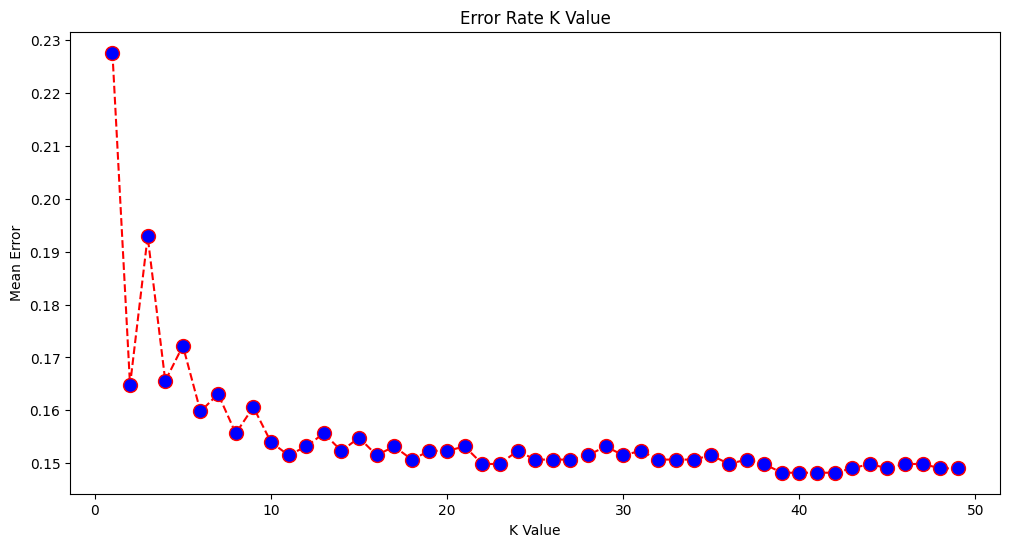

In [83]:
#Plot
plt.figure(figsize=(12, 6))
# attributes for visualization
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
#title
plt.title('Error Rate K Value')
#x-label
plt.xlabel('K Value')
#y-label
plt.ylabel('Mean Error')

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [84]:
# Create KNN classifier - K Value 39
knn39 = KNeighborsClassifier(n_neighbors = 39)
# Fit the classifier to the data
knn39.fit(KNN_x_train,KNN_y_train)

KNeighborsClassifier(n_neighbors=39)

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [85]:
#Perform predictions on the test data
KNN39_pred=knn39.predict(KNN_x_test)

Reference : Tutorial 3 , Page 7,8,9,10,11,12

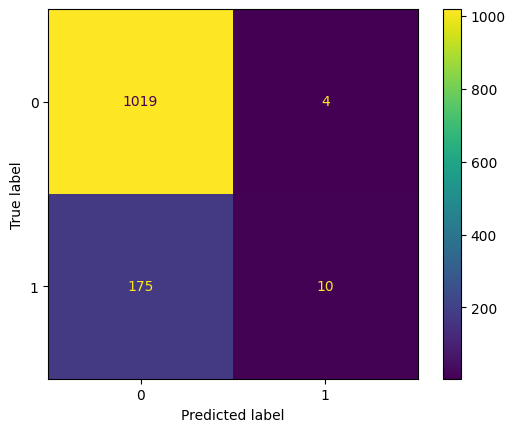

In [86]:
# Construct the confusion matrix
cm_knn39 = confusion_matrix(KNN_y_test, KNN39_pred, labels = knn39.classes_)
#Plot the confusion matrix
disp_knn39_cm = ConfusionMatrixDisplay(cm_knn39, display_labels=knn39.classes_)
#Display
disp_knn39_cm.plot()

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [87]:
#print Classification matrix for -KNN9
print(classification_report(KNN_y_test, KNN_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1023
           1       0.41      0.11      0.18       185

    accuracy                           0.84      1208
   macro avg       0.64      0.54      0.54      1208
weighted avg       0.79      0.84      0.80      1208



Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [88]:
#print classification matrix for KNN39
print(classification_report(KNN_y_test, KNN39_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1023
           1       0.71      0.05      0.10       185

    accuracy                           0.85      1208
   macro avg       0.78      0.53      0.51      1208
weighted avg       0.83      0.85      0.79      1208



Reference : Tutorial 3 , Page 7,8,9,10,11,12

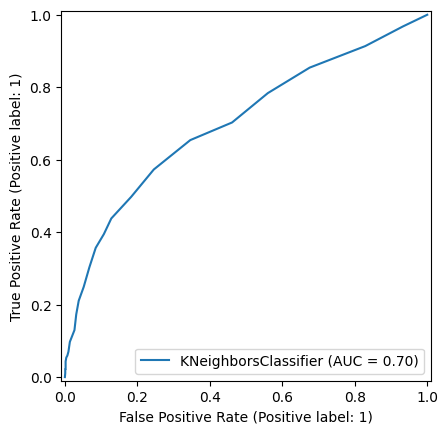

In [89]:
#AUC-ROc for KNN 39
knn39_roc = RocCurveDisplay.from_estimator(knn39, KNN_x_test, KNN_y_test)

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [90]:
#hyperparameter grid for GridserachCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced']
}

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [91]:
#create new empty model
logreg = LogisticRegression(max_iter=1000)
#apply GridSearchCV
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
#fit the model
grid.fit(LR_x_train, LR_y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [92]:
#print best parameters
print("Best parameters:", grid.best_params_)

# Predict using best model
#innitiate
best_logreg = grid.best_estimator_
#predict
LR_y_pred_tuned = best_logreg.predict(LR_x_test)

Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'solver': 'liblinear'}


Reference : Tutorial 3 , Page 7,8,9,10,11,12

In [93]:
#print Classification matrix
print(classification_report(LR_y_test, LR_y_pred_tuned))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1023
           1       0.29      0.62      0.40       185

    accuracy                           0.71      1208
   macro avg       0.60      0.67      0.60      1208
weighted avg       0.82      0.71      0.75      1208



Reference : Tutorial 3 , Page 7,8,9,10,11,12

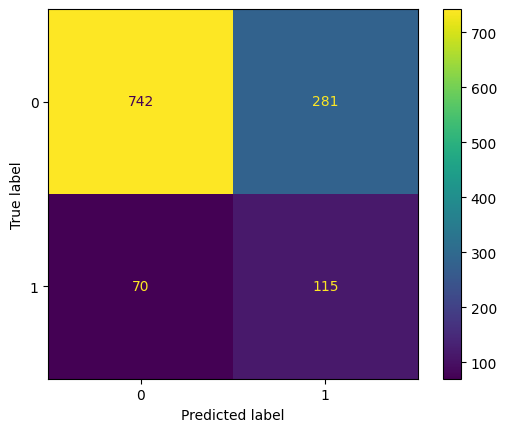

In [94]:
# Construct the confusion matrix
cm_tuned = confusion_matrix(LR_y_test, LR_y_pred_tuned)
#Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned)
#display
disp.plot()

Reference : Tutorial 3 , Page 7,8,9,10,11,12

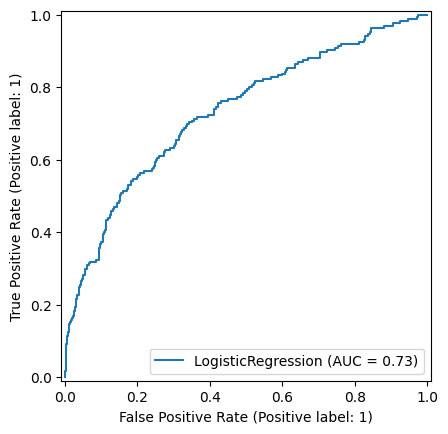

In [95]:
#AUC-Roc for LR optimized model
RocCurveDisplay.from_estimator(best_logreg, LR_x_test, LR_y_test)

Referece : Readthedocs.io. (2021). Joblib: running Python functions as pipeline jobs — joblib 1.4.2 documentation. [online] Available at: https://joblib.readthedocs.io/en/stable/# [Accessed 5 May 2025].

In [96]:
#Save the trained models
#Logistic regressiong - optimized
joblib.dump(best_logreg,'/content/drive/MyDrive/CW-ML/trained models/LR_model.pkl')
#Naive Bayes
joblib.dump(nb,'/content/drive/MyDrive/CW-ML/trained models/NB_model.pkl')
#KNN -9
joblib.dump(knn,'/content/drive/MyDrive/CW-ML/trained models/KNN_model.pkl')
#KNN-39
joblib.dump(knn39,'/content/drive/MyDrive/CW-ML/trained models/KNN39_model.pkl')

['/content/drive/MyDrive/CW-ML/trained models/KNN39_model.pkl']